## Prediction

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, auc, roc_auc_score, confusion_matrix, f1_score, precision_score, recall_score, roc_curve

In [3]:
data = pd.read_csv("Train1.0.csv", sep=',',index_col=0)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4250 entries, 0 to 4249
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   account_length                 4250 non-null   int64  
 1   international_plan             4250 non-null   int64  
 2   number_vmail_messages          4250 non-null   int64  
 3   total_day_minutes              4250 non-null   float64
 4   total_day_calls                4250 non-null   int64  
 5   total_eve_minutes              4250 non-null   float64
 6   total_eve_calls                4250 non-null   int64  
 7   total_night_minutes            4250 non-null   float64
 8   total_night_calls              4250 non-null   int64  
 9   total_intl_minutes             4250 non-null   float64
 10  total_intl_calls               4250 non-null   int64  
 11  number_customer_service_calls  4250 non-null   int64  
 12  churn                          4250 non-null   int64 

In [4]:
X=data.drop('churn',axis=1)
y=data.churn

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [6]:
X_train.shape

(3187, 12)

In [7]:
X_test.shape

(1063, 12)

#### Linear Regression

In [8]:
LR = LogisticRegression(max_iter=1000).fit(X_train,y_train)

#### Random Forest 

In [9]:
clf = RandomForestClassifier()
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.9548447789275635

In [10]:
f1_score(y_test, clf.predict(X_test))

0.8248175182481752

In [11]:
roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1])

0.9023973086817629

In [12]:
feature_importances_df = pd.DataFrame({"features": list(X_train), "feature_importances": clf.feature_importances_})
feature_importances_df.sort_values("feature_importances", ascending=False)

array([0.04902838, 0.07404222, 0.04043132, 0.27127647, 0.04823722,
       0.10257296, 0.04215672, 0.0636261 , 0.04420427, 0.07787862,
       0.06662043, 0.11992528])

0.9507325187128142 70


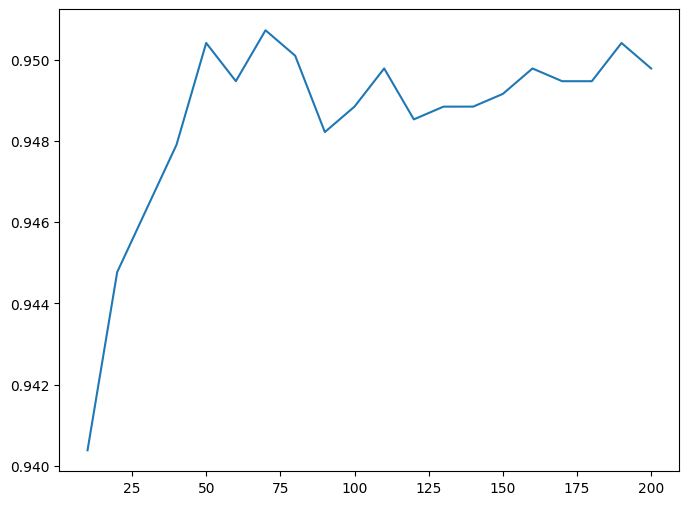

In [13]:
score = []
for i in range(10,201,10):
    rfc = RandomForestClassifier(n_estimators= i,random_state=0)
    score_ = cross_val_score(rfc,X_train,y_train,cv=5).mean()
    score.append(score_)
print(max(score),np.arange(10, 201, 10)[np.argmax(score)])
plt.figure(figsize=(8,6))
plt.plot(range(10,201,10),score)
plt.show()

0.95041903908899 20


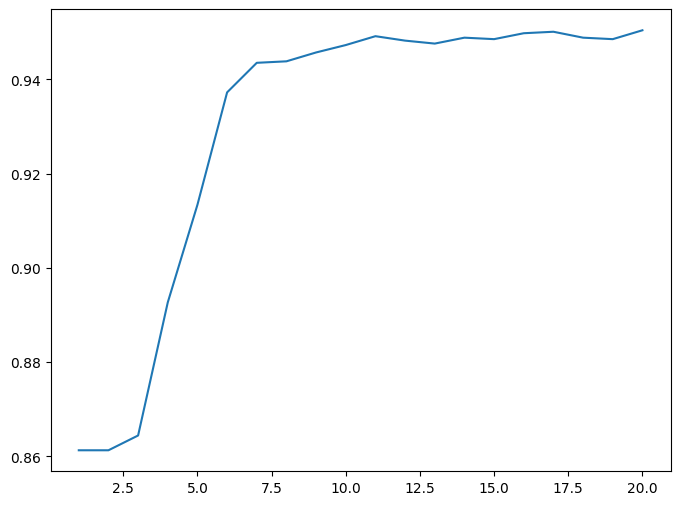

In [14]:
score_2= []
for i in np.arange(1, 21, 1):
    rfc = RandomForestClassifier(n_estimators=70,max_depth= i,random_state=0)
    score_ = cross_val_score(rfc,X_train,y_train,cv=5).mean()
    score_2.append(score_)
print(max(score_2),np.arange(1, 21, 1)[np.argmax(score_2)])
plt.figure(figsize=(8,6))
plt.plot(np.arange(1, 21, 1),score_2)
plt.show()

0.9523013931880927 7


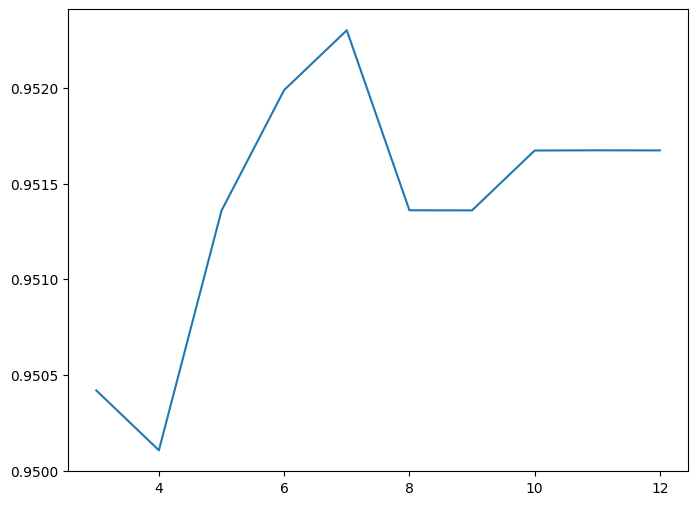

In [15]:
score_3 = []
for i in np.arange(3, 13, 1):
    rfc = RandomForestClassifier(n_estimators= 70,max_depth= 20,max_features= i,random_state=0)
    score_ = cross_val_score(rfc,X_train,y_train,cv=5).mean()
    score_3.append(score_)
print(max(score_3),np.arange(3, 13, 1)[np.argmax(score_3)])
plt.figure(figsize=(8,6))
plt.plot(np.arange(3, 13, 1),score_3)
plt.show()

0.9523013931880927 2


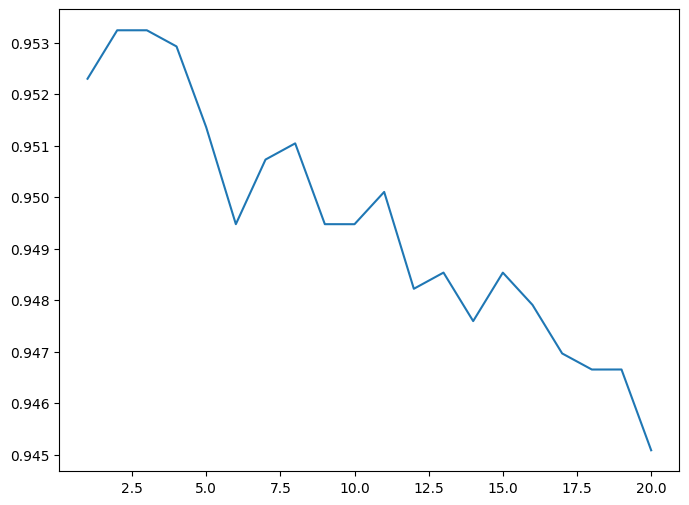

In [16]:
score_4 = []
for i in np.arange(1, 21, 1):
    rfc = RandomForestClassifier(n_estimators= 70,max_depth= 20, max_features= 7, min_samples_leaf = i, random_state=0)
    score_ = cross_val_score(rfc,X_train,y_train,cv=5).mean()
    score_4.append(score_)
print(max(score_3),np.arange(1, 21, 1)[np.argmax(score_4)])
plt.figure(figsize=(8,6))
plt.plot(np.arange(1, 21, 1),score_4)
plt.show()

0.9532428162970035 2


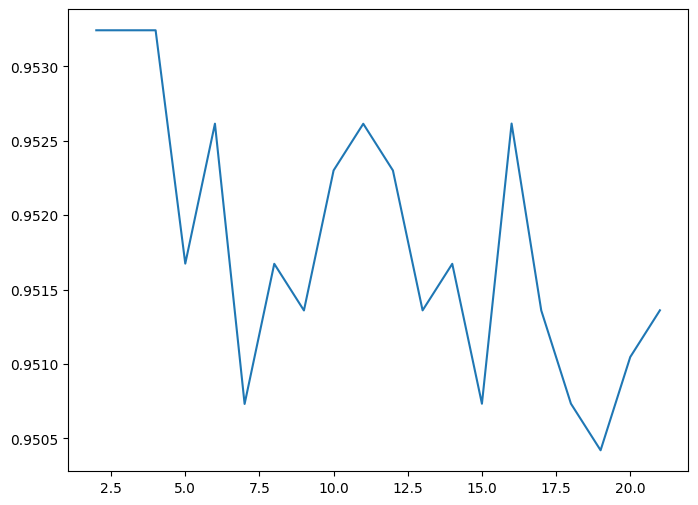

In [17]:
score_5 = []
for i in np.arange(2, 22, 1):
    rfc = RandomForestClassifier(n_estimators= 70,max_depth= 20, max_features= 7, min_samples_leaf = 2, min_samples_split= i,random_state=0)
    score_ = cross_val_score(rfc,X_train,y_train,cv=5).mean()
    score_5.append(score_)
print(max(score_5),np.arange(2, 22, 1)[np.argmax(score_5)])
plt.figure(figsize=(8,6))
plt.plot(np.arange(2, 22, 1),score_5)
plt.show()

In [18]:
clf = RandomForestClassifier(n_estimators=70
         ,max_depth=20
         ,max_features=7
         ,min_samples_leaf=2
         ,min_samples_split=2
         ,random_state=0
         )
clf = clf.fit(X_train,y_train)

In [19]:
clf.score(X_test,y_test)

0.9539040451552211

In [20]:
f1_score(y_test, clf.predict(X_test))

0.8292682926829268

In [21]:
roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1])

0.9086238091199501

In [23]:
feature_importances_df = pd.DataFrame({"features": list(X_train), "feature_importances": clf.feature_importances_})
feature_importances_df.sort_values("feature_importances", ascending=False)

,features,feature_importances
3,total_day_minutes,0.295679
11,number_customer_service_calls,0.128634
5,total_eve_minutes,0.123732
10,total_intl_calls,0.082375
9,total_intl_minutes,0.081000
1,international_plan,0.068541
2,number_vmail_messages,0.063169
7,total_night_minutes,0.056030
4,total_day_calls,0.027534
0,account_length,0.026315
